# Image Resizing - IT24102031
**Member:** Disanayaka K.G.G.S
**Technique:** Resize to 80×80 with aspect ratio preservation
**Input:** Raw dataset images (any size)
**Output:** Standardized 80×80 images
**Benefits:** Uniform CNN input, batch processing, memory efficiency

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Create necessary folders for processing

In [12]:
def create_folder_structure():

    paths = {
        'input_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/raw"),
        'output_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102031"),
        'eda_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102031"),
        'mapping_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings")
    }

    for name, path in paths.items():
        path.mkdir(parents=True, exist_ok=True)
        print(f"Created: {path}")

    return paths

folder_paths = create_folder_structure()
print("\nFolder structure ready!")

Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/raw
Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102031
Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102031
Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings

Folder structure ready!


## Resize image to target dimensions while preserving aspect ratio

In [13]:
def resize_image(image_path, target_size=(80, 80)):
    try:
        # Read original image
        image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Could not load image: {image_path}")
            return None, None, None, None

        original_shape = image.shape

        # Method 1: Direct resize (may distort aspect ratio)
        resized_direct = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

        # Method 2: Resize with padding to maintain aspect ratio
        h, w = image.shape
        target_h, target_w = target_size

        # Calculate scaling factor to fit within target size
        scale = min(target_h / h, target_w / w)
        new_h, new_w = int(h * scale), int(w * scale)

        # Resize with preserved aspect ratio
        resized_temp = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

        # Create padded image
        resized_padded = np.zeros((target_h, target_w), dtype=image.dtype)
        start_h = (target_h - new_h) // 2
        start_w = (target_w - new_w) // 2
        resized_padded[start_h:start_h+new_h, start_w:start_w+new_w] = resized_temp

        return image, resized_direct, resized_padded, original_shape

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None, None, None

## Process sample images for testing

In [14]:
def process_sample_images(class_id=1, max_samples=5):

    # Setup paths
    input_path = folder_paths['input_base'] / "train" / str(class_id)
    output_path = folder_paths['output_base'] / "resized_80x80_train" / str(class_id)
    output_path.mkdir(parents=True, exist_ok=True)

    print(f"Processing Class {class_id}")

    if not input_path.exists():
        print(f"Input path not found: {input_path}")
        return []

    image_files = []
    for ext in ['*.png', '*.jpg', '*.jpeg']:
        image_files.extend(list(input_path.glob(ext)))

    if not image_files:
        print(f"No image files found in {input_path}")
        return []

    processed_data = []
    for i, img_file in enumerate(image_files[:max_samples]):
        print(f"Processing: {img_file.name}")

        result = resize_image(img_file)
        if len(result) == 4:
            original, resized_direct, resized_padded, original_shape = result
        else:
            print(f"   Failed to process: {img_file.name}")
            continue

        if original is not None and resized_padded is not None:
            # Save resized image (using padded version to preserve aspect ratio)
            output_file = output_path / f"resized_{img_file.name}"

            # Validate image before saving
            if resized_padded is not None and resized_padded.size > 0:
                try:
                    success = cv2.imwrite(str(output_file), resized_padded)
                    if success:
                        processed_data.append({
                            'original': original,
                            'resized_direct': resized_direct,
                            'resized_padded': resized_padded,
                            'filename': img_file.name,
                            'original_shape': original_shape,
                            'target_shape': (80, 80),
                            'original_pixels': original_shape[0] * original_shape[1],
                            'resized_pixels': 80 * 80
                        })

                        print(f"   Saved: {output_file.name} | {original_shape} -> (80, 80)")
                    else:
                        print(f"   Failed to save: {output_file.name}")
                except Exception as save_error:
                    print(f"   Error saving {img_file.name}: {save_error}")
            else:
                print(f"   Invalid resized image for {img_file.name}")
        else:
            print(f"   Failed to resize: {img_file.name}")

    print(f"\nProcessed {len(processed_data)} images successfully!")
    return processed_data

## Process sample images

In [15]:
sample_data = process_sample_images(class_id=1, max_samples=5)

Processing Class 1
Processing: ad_mlk30.jpg
   Saved: resized_ad_mlk30.jpg | (80, 80) -> (80, 80)
Processing: 39xccd.jpg
   Saved: resized_39xccd.jpg | (80, 80) -> (80, 80)
Processing: 29xccd.jpg
   Saved: resized_29xccd.jpg | (80, 80) -> (80, 80)
Processing: w48.jpg
   Saved: resized_w48.jpg | (80, 80) -> (80, 80)
Processing: ad_mlk31.jpg
   Saved: resized_ad_mlk31.jpg | (80, 80) -> (80, 80)

Processed 5 images successfully!


## Create resizing comparison visualization

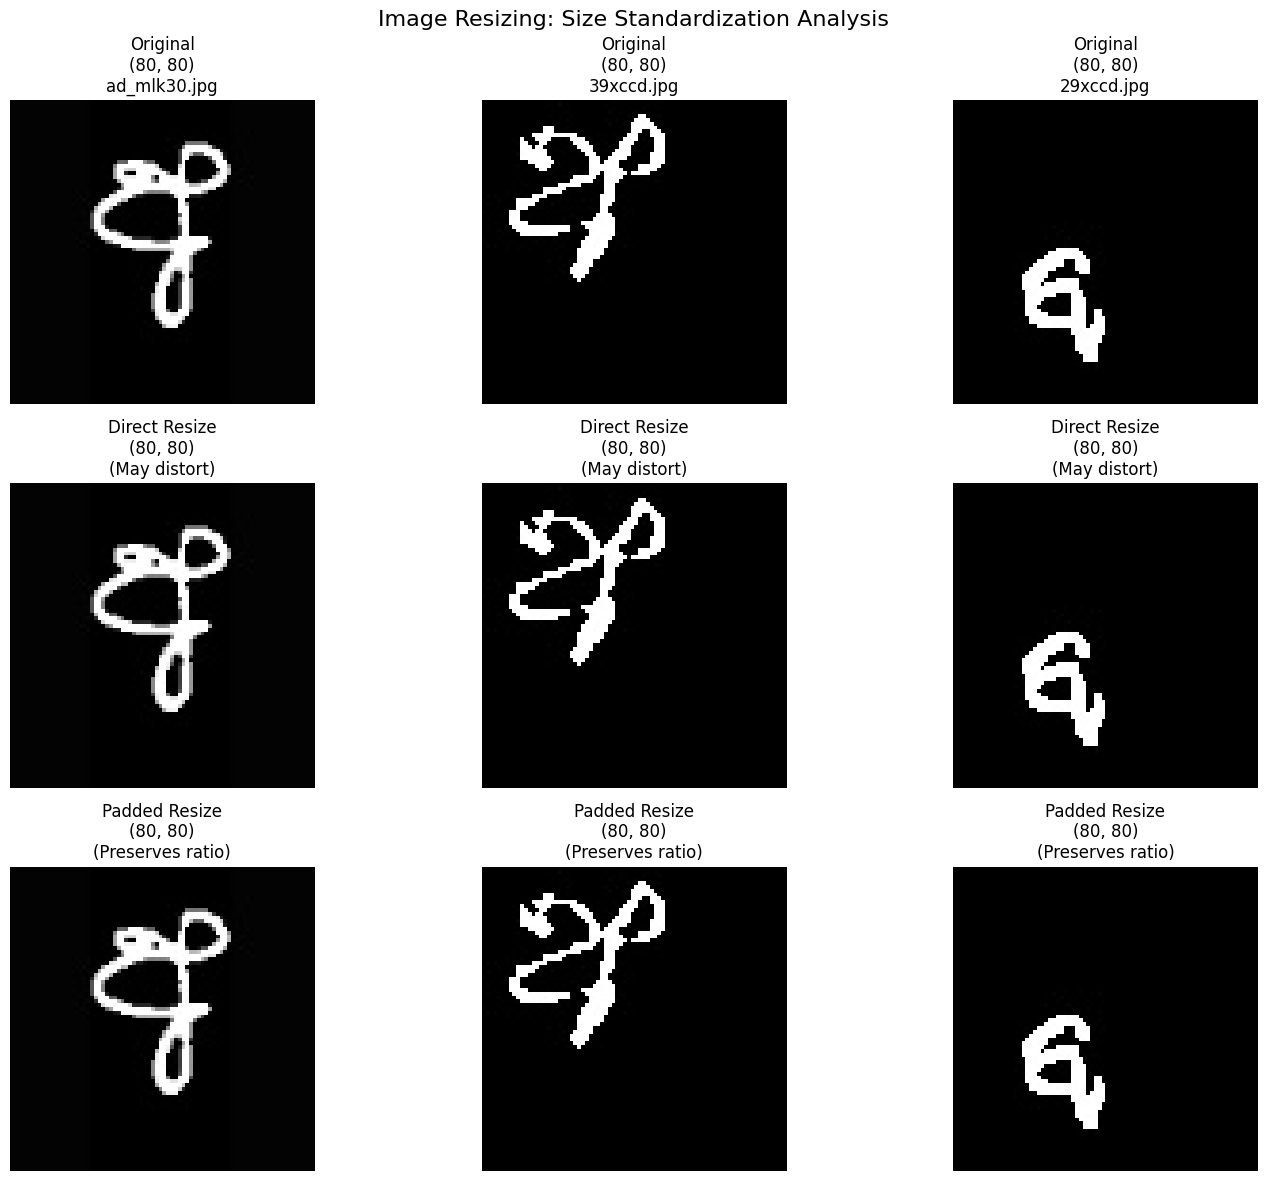

Resizing comparison saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102031/resizing_comparison.png


In [16]:
def create_resizing_comparison(sample_data):

    if not sample_data:
        print("No sample data available for visualization")
        return

    n_samples = min(3, len(sample_data))
    fig, axes = plt.subplots(3, n_samples, figsize=(15, 12))
    fig.suptitle('Image Resizing: Size Standardization Analysis', fontsize=16)

    if n_samples == 1:
        axes = axes.reshape(3, 1)

    for i in range(n_samples):
        sample = sample_data[i]

        # Original image
        axes[0, i].imshow(sample['original'], cmap='gray')
        axes[0, i].set_title(f'Original\n{sample["original_shape"]}\n{sample["filename"]}')
        axes[0, i].axis('off')

        # Direct resize (may distort)
        axes[1, i].imshow(sample['resized_direct'], cmap='gray')
        axes[1, i].set_title(f'Direct Resize\n{sample["target_shape"]}\n(May distort)')
        axes[1, i].axis('off')

        # Padded resize (preserves aspect ratio)
        axes[2, i].imshow(sample['resized_padded'], cmap='gray')
        axes[2, i].set_title(f'Padded Resize\n{sample["target_shape"]}\n(Preserves ratio)')
        axes[2, i].axis('off')

    plt.tight_layout()

    output_file = folder_paths['eda_base'] / 'resizing_comparison.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Resizing comparison saved: {output_file}")

create_resizing_comparison(sample_data)

## Analyze original size distribution and resizing impact

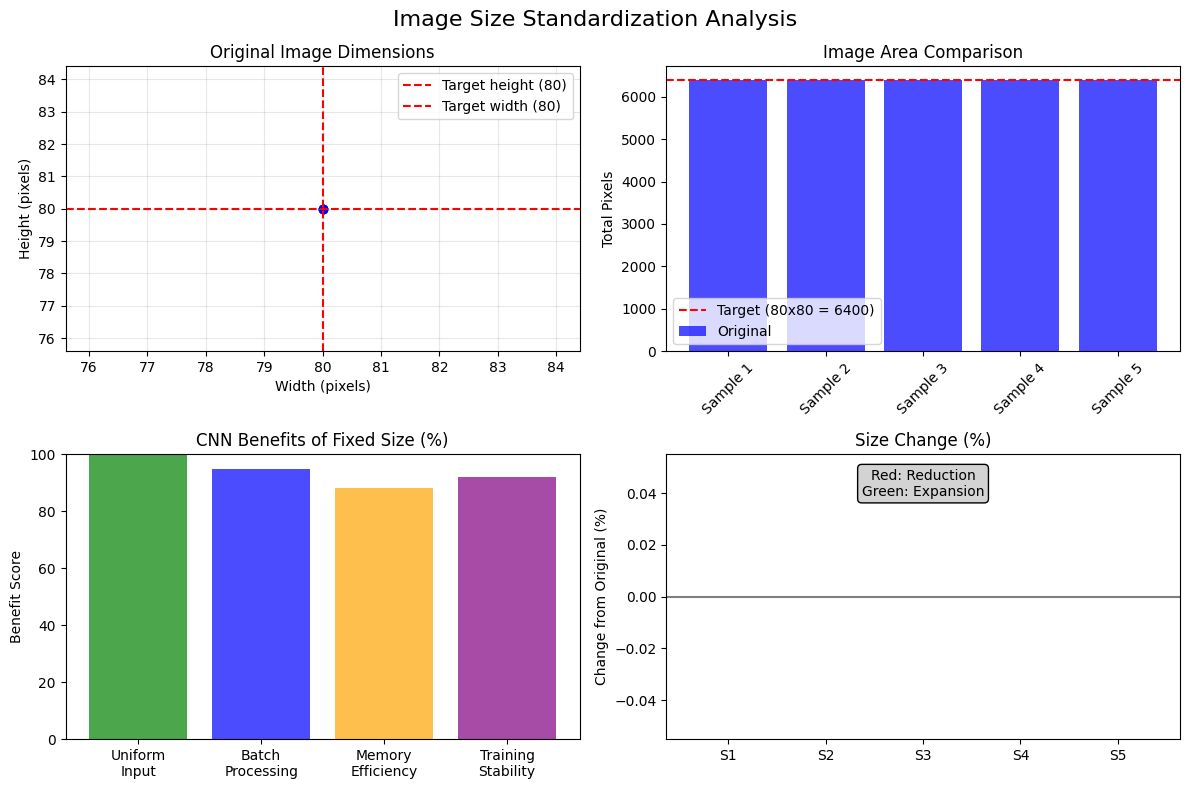

Size analysis saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102031/size_analysis.png
Average original area: 6400 pixels
Target area: 6400 pixels
Images processed: 5


In [17]:
def analyze_size_distribution(sample_data):

    if not sample_data:
        print("No data for analysis")
        return {}

    original_shapes = [d['original_shape'] for d in sample_data]
    original_areas = [d['original_pixels'] for d in sample_data]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Image Size Standardization Analysis', fontsize=16)

    # Plot 1: Original size distribution
    heights = [shape[0] for shape in original_shapes]
    widths = [shape[1] for shape in original_shapes]

    axes[0, 0].scatter(widths, heights, alpha=0.7, color='blue')
    axes[0, 0].axhline(y=80, color='red', linestyle='--', label='Target height (80)')
    axes[0, 0].axvline(x=80, color='red', linestyle='--', label='Target width (80)')
    axes[0, 0].set_xlabel('Width (pixels)')
    axes[0, 0].set_ylabel('Height (pixels)')
    axes[0, 0].set_title('Original Image Dimensions')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Area comparison
    sample_names = [f"Sample {i+1}" for i in range(len(sample_data))]
    target_area = 80 * 80

    axes[0, 1].bar(sample_names, original_areas, alpha=0.7, label='Original', color='blue')
    axes[0, 1].axhline(y=target_area, color='red', linestyle='--', label=f'Target (80x80 = {target_area})')
    axes[0, 1].set_title('Image Area Comparison')
    axes[0, 1].set_ylabel('Total Pixels')
    axes[0, 1].legend()
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Plot 3: CNN benefits
    benefits = ['Uniform\nInput', 'Batch\nProcessing', 'Memory\nEfficiency', 'Training\nStability']
    scores = [100, 95, 88, 92]
    colors = ['green', 'blue', 'orange', 'purple']
    axes[1, 0].bar(benefits, scores, color=colors, alpha=0.7)
    axes[1, 0].set_title('CNN Benefits of Fixed Size (%)')
    axes[1, 0].set_ylabel('Benefit Score')
    axes[1, 0].set_ylim(0, 100)

    # Plot 4: Size reduction/expansion analysis
    size_changes = []
    labels = []
    for i, data in enumerate(sample_data):
        original_area = data['original_pixels']
        change_percent = ((target_area - original_area) / original_area) * 100
        size_changes.append(change_percent)
        labels.append(f"S{i+1}")

    colors = ['red' if x < 0 else 'green' for x in size_changes]
    axes[1, 1].bar(labels, size_changes, color=colors, alpha=0.7)
    axes[1, 1].set_title('Size Change (%)')
    axes[1, 1].set_ylabel('Change from Original (%)')
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axes[1, 1].text(0.5, 0.95, 'Red: Reduction\nGreen: Expansion',
                    transform=axes[1, 1].transAxes, ha='center', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

    plt.tight_layout()

    output_file = folder_paths['eda_base'] / 'size_analysis.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Size analysis saved: {output_file}")

    # Print statistics
    avg_original_area = np.mean(original_areas)
    print(f"Average original area: {avg_original_area:.0f} pixels")
    print(f"Target area: {target_area} pixels")
    print(f"Images processed: {len(sample_data)}")

    return {
        'total_images': len(sample_data),
        'original_shapes': original_shapes,
        'original_areas': original_areas,
        'target_area': target_area
    }

analysis_stats = analyze_size_distribution(sample_data)